# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-11-23 16:00:03.812317


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/22/20


,11/22/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,12246849,256782,2.10
Brazil,6071401,169183,2.79
India,9139865,133738,1.46
Mexico,1041875,101676,9.76
United Kingdom,1515802,55120,3.64
Italy,1408868,49823,3.54
France,2191180,48807,2.23


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 11/22/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
53547,US,11926053,2020-11-20,254413.0,1878.0,196004.0,167878.000000
53546,US,11730049,2020-11-19,252535.0,2015.0,187955.0,165242.571429
53545,US,11542094,2020-11-18,250520.0,1848.0,170384.0,161426.857143
53544,US,11371710,2020-11-17,248672.0,1707.0,160499.0,157592.571429
53543,US,11211211,2020-11-16,246965.0,758.0,160351.0,154333.571429
53542,US,11050860,2020-11-15,246207.0,616.0,133244.0,148764.285714
53541,US,10917616,2020-11-14,245591.0,1266.0,166709.0,145428.857143


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/22/20


,11/22/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,596214,34319.0,5.76
Texas,1153612,21013.0,1.82
California,1114524,18726.0,1.68
Florida,938414,17991.0,1.92
New Jersey,306007,16761.0,5.48
Illinois,656298,12050.0,1.84
Massachusetts,206850,10512.0,5.08


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 11/22/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1833,California,1089750,2020-11-20,18640.0,98.0,12576.0,10883.428571
1832,California,1077174,2020-11-19,18542.0,89.0,13134.0,10436.857143
1831,California,1064040,2020-11-18,18453.0,106.0,11755.0,9780.714286
1830,California,1052285,2020-11-17,18347.0,59.0,10595.0,8979.000000
1829,California,1041690,2020-11-16,18288.0,26.0,9595.0,8627.571429
1828,California,1032095,2020-11-15,18262.0,9.0,9028.0,8483.142857
1827,California,1023067,2020-11-14,18253.0,48.0,9501.0,7672.142857


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 11/22/20


,11/22/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,364520,7438.0,2.04
Orange,69694,1554.0,2.23
Riverside,80676,1400.0,1.74
San Bernardino,84531,1129.0,1.34
San Diego,71648,968.0,1.35
Sacramento,33133,546.0,1.65
San Joaquin,24649,503.0,2.04


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 11/22/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5811,Los Angeles,357451,2020-11-20,7396.0,33.0,4219.0,3512.285714
5810,Los Angeles,353232,2020-11-19,7363.0,28.0,4896.0,3254.571429
5809,Los Angeles,348336,2020-11-18,7335.0,36.0,3813.0,2910.285714
5808,Los Angeles,344523,2020-11-17,7299.0,24.0,2180.0,2663.857143
5807,Los Angeles,342343,2020-11-16,7275.0,6.0,2783.0,2674.000000
5806,Los Angeles,339560,2020-11-15,7269.0,3.0,3011.0,2797.571429
5805,Los Angeles,336549,2020-11-14,7266.0,20.0,3684.0,2367.428571
5804,Los Angeles,332865,2020-11-13,7246.0,25.0,2415.0,2172.714286
5803,Los Angeles,330450,2020-11-12,7221.0,5.0,2486.0,2126.571429
5802,Los Angeles,327964,2020-11-11,7216.0,16.0,2088.0,2062.571429



7 day new US cases as of 11/22/20


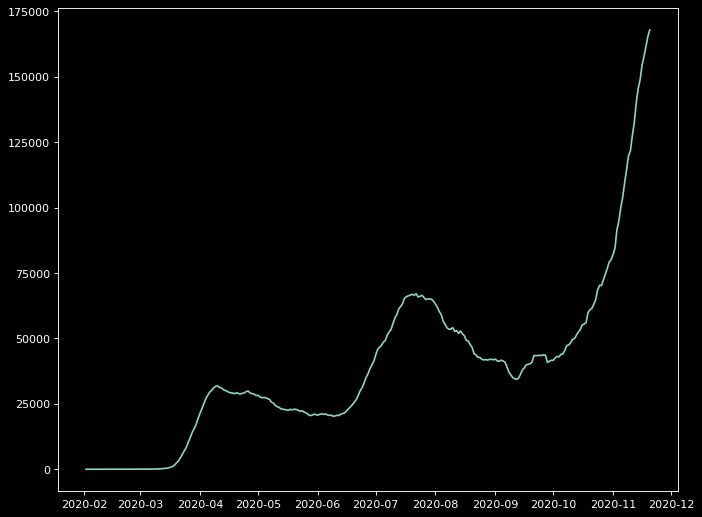

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 11/22/20


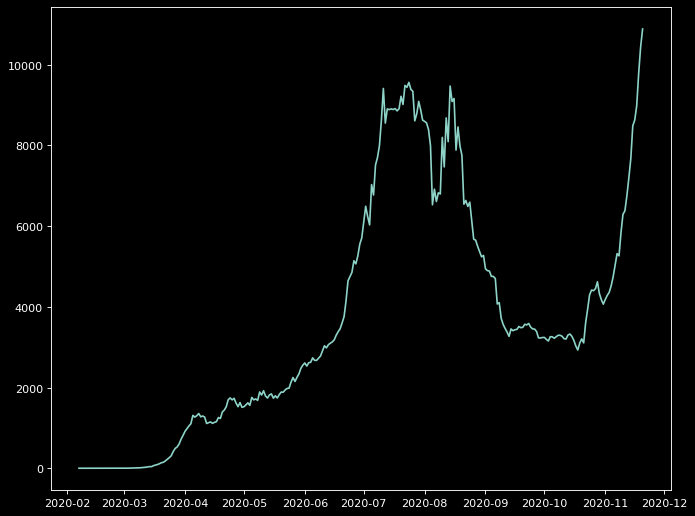

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 11/22/20


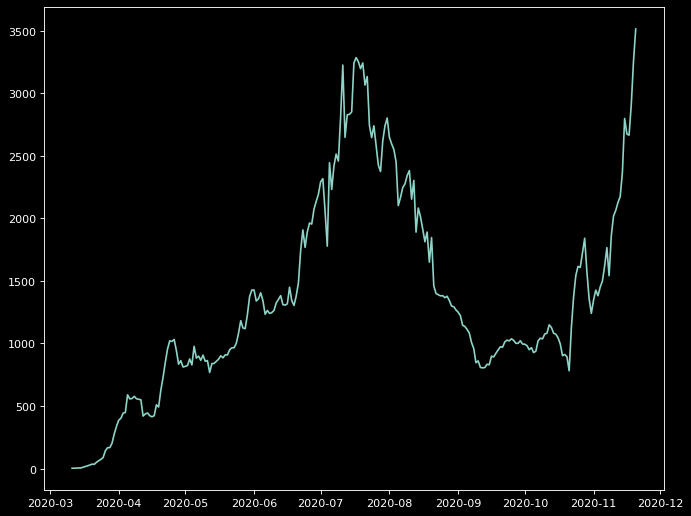

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()